# Introduction to Numerical ODE Solutions
*Source: http://phys.csuchico.edu/ayars/312 *


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler method

Define a differential equation: simple harmonic motion

In [2]:
def SHO(state, time):
    g0 = state[1]
    g1 = -omega*omega*state[0]
    return np.array([g0,g1])


### Definition of the Euler method

In [3]:
def euler(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = np.zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
    # return the answer
    return y


### Example

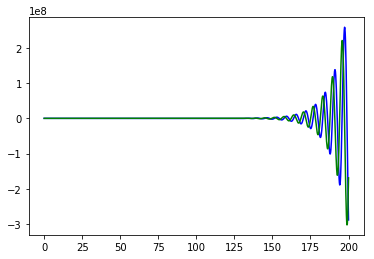

In [4]:
initial_state = np.array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
wanted_times = np.linspace(0, 200, 1000)
answer = euler(SHO, initial_state, wanted_times)

# Plot the results
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()


### Euler-Cromer (improved Euler)

In [5]:
def eulerC(derivs, yo, times):
    elements = len(yo)
    N = len(times)
    y = np.zeros([N, elements])

    # initial condition
    y[0] = yo

    # calculate the rest
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j] = y[j-1] + derivs(y[j-1], t)*dt
        
        
    # improve the calculation by computing the velocity at the *next* step    
    for j in range(1,N):
        t = times[j]
        dt = t-times[j-1]
        y[j,0] = y[j-1,0] + derivs(y[j-1], t)[0]*dt    
        y[j,1] = y[j-1,1] + derivs(y[j], t)[1]*dt    
    # return the answer
    return y


### Same example

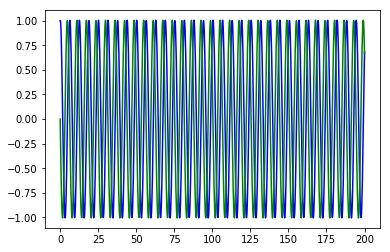

In [6]:
answer = eulerC(SHO, initial_state, wanted_times)

# Plot the results
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'b-')
plt.plot(wanted_times, v, 'g-')
plt.show()


## Runge-Kutta method

Now try to implement a 2nd-order RK
This function moves the value of ’y’ forward by a single step of size ’dt’, 
using a second−order Runge−Kutta algorithm. This particular algorithm is equivalent to 
finding the average of the slope at time t and at time
( t+dt ) , and using that average slope to find value of y.

In [7]:
def rk2(y, time, dt, derivs): 
    k0 = dt*derivs(y, time)
    k1 = dt*derivs(y+k0, time+dt) 
    y_next = y+0.5*(k0+k1)
    return y_next


### Examples

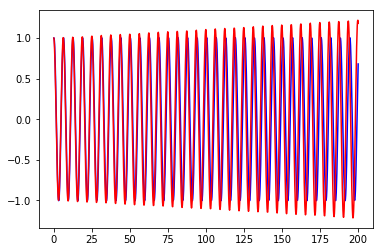

In [8]:
initial_state = np.array([1,0])    # Here the initial condition is x!=0, v=0.
omega = 1
N = 1000
tau = 200
dt = tau/float(N-1)
wanted_times = np.linspace(0, tau, N)

answerE  = euler(SHO, initial_state, wanted_times)

answerRK = np.zeros([N,2])
answerRK[0,:] = initial_state
for j in range (N-1):
    answerRK[j+1] = rk2(answerRK[j], 0, dt , SHO)

# Plot the results
xE = answerE[:,0]
vE = answerE[:,1]
xRK = answerRK[:,0]
vRK = answerRK[:,1]
plt.plot(wanted_times, x, 'b-')
#plt.plot(wanted_times, xE, 'g-')
plt.plot(wanted_times, xRK, 'r-')
plt.show()


## SciPy library 

SciPy offers an interface to LSODA routine from ODEPACK Fortran library (adaptive, high-performance multi-step integration) -- scipy.integrate.odeint routine

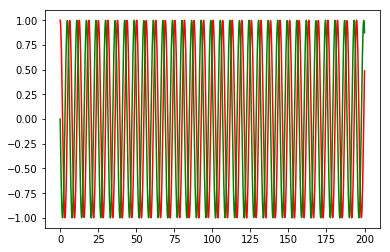

In [9]:
from scipy.integrate import odeint

answer  = odeint(SHO, initial_state, wanted_times)
x = answer[:,0]
v = answer[:,1]
plt.plot(wanted_times, x, 'r-')
plt.plot(wanted_times, v, 'g-')
plt.show()
